# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
#импортируем pandas, распаковываем файл
import pandas as pd
import numpy as np

df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
pd.set_option('display.max_columns', None)
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,False,False,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,False,False,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,False,False,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,False,False,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Всего у нас есть 22 стобца, в большинстве из них есть пропуски, которые мы рассмотрим позднее. 

In [3]:
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [4]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


С помощью `.describe()` можно отметить первые особенности столбцов.  
1. `total_images` - в среднем в каждом объявлении около 9 фото. 
2. `last_price` - возможности узнать, в какой величине представлена величина нет, но учитывая, что это объявления из Санкт-Петербурга, сделаем предположение о том, что цена отражена в рублях. Конечно, минимальное значение 12190, что смущает, но это объявление мы рассмотрим немного позднее.
3. `total_area` - мы знаем, что величина исчисляется в квадратных метрах. Среднее отклонение большое, что может говорить о выбросах (например, квартира 900 м2).
4. `rooms` - минимальное количество комнат - ноль. Вероятнее всего это квартиры-студии. Максимальное - 19, что тоже кажется большим числом, но при этом важно помнить о квартире за 900 000 000 рублей.
5. `ceiling_height` - высота потолков в метрах. В этой колонке встречается достаточно много пропущенных значений (немного позже разберем что с нми делать). При этом максимальный показатель - 100 м (неизвестно на сколько это может быть реально).
6. `floors_total` - количество этажей в доме. Данная величина также имеет пропуски, но уже видно, что это совсем небольшая доля пропусков. Также не совсем уверена в том, что в Петербурге есть 60-этажные здания, в скором времени проверим.
7. `living_area` - пропусков не так много, но они есть. У нас есть похожая переменная, но если здесь у нас жилая площадь, то в другой общая площадь. Предполагаю, что пропуски буду заполнять связью с переменной total_area, так как как раз в этом столбце нет пропусков.
8. `floor` - этаж указан во всех обьявлениях. Максимальное значение - 33, что от части может подтвердить то, что в Санкт-Петербурге нет 60-этажных зданий (пока это гипотеза).
9. `kitchen_area` - есть пропуски, но не так много. Медиана - 9,1 м2 (смотрим на медиану, а не на среднее, так как есть выбросы в виде огромных квартир, в которых есть кухня с площадью 112 м2)
10. `balcony` - количество балконов в обьекте недвижимости.
11. `airports_nearest` - смущает минимальное значение - 0 м. Вряд ли квартира может находится прямо в аэропорту. Вероятнее всего это неверные данные и их стоит рассматривать скорее как пропуски.
12. `cityCenters_nearest` - не совсем понятно, имеется ли здесь ввиду расстояние до центра Петербурга или до центра ближайшего города. Из названия колонки можно сделать вывод, что до центра ближайшего города.
13. `parks_around3000` - количество парков в радиусе 3 км. Максимальное значение 3, что выглядит неплохо, единственная проблема данной переменной - пропуски.
14. `parks_nearest` - расстояние до ближайшего парка. Расстояния в среднем достаточно большое, но стоит отметить достаточно большое стандартное отклонение и вообще большой разброс данных.
15. `ponds_around3000` - число водоемов в радиусе 3 км. Интересно, что такой же показатель по паркам имеет такие же максимум и минимум, но у водоемов среднее немного больше.
16. `ponds_nearest` - очень много пропусков.
17. `days_exposition` - число дней, которые обьявление висит на сайте. Очень высокое стандартное отклонение. Максимальное число дней - 1580 (более 4 лет). По ощущениям слишком много, будем проверять.

Также у нас есть колонки с булевым и вещественным типами данных:  
18. `first_day_exposition` - сейчас это вещественный тип данных. Надо его перевести в формат даты для дальнейших вычислений, но это позже.   
19. `is_apartment` - в данной перемнной меньше всего данных.  
20. `studio` - является ли квартира студией   
21. `open_plan` - свободная ли планировка у квартиры  
22. `locality_name` - название населенного пункта. Это может нам помочь в заполнении пропусков в других колонках.  

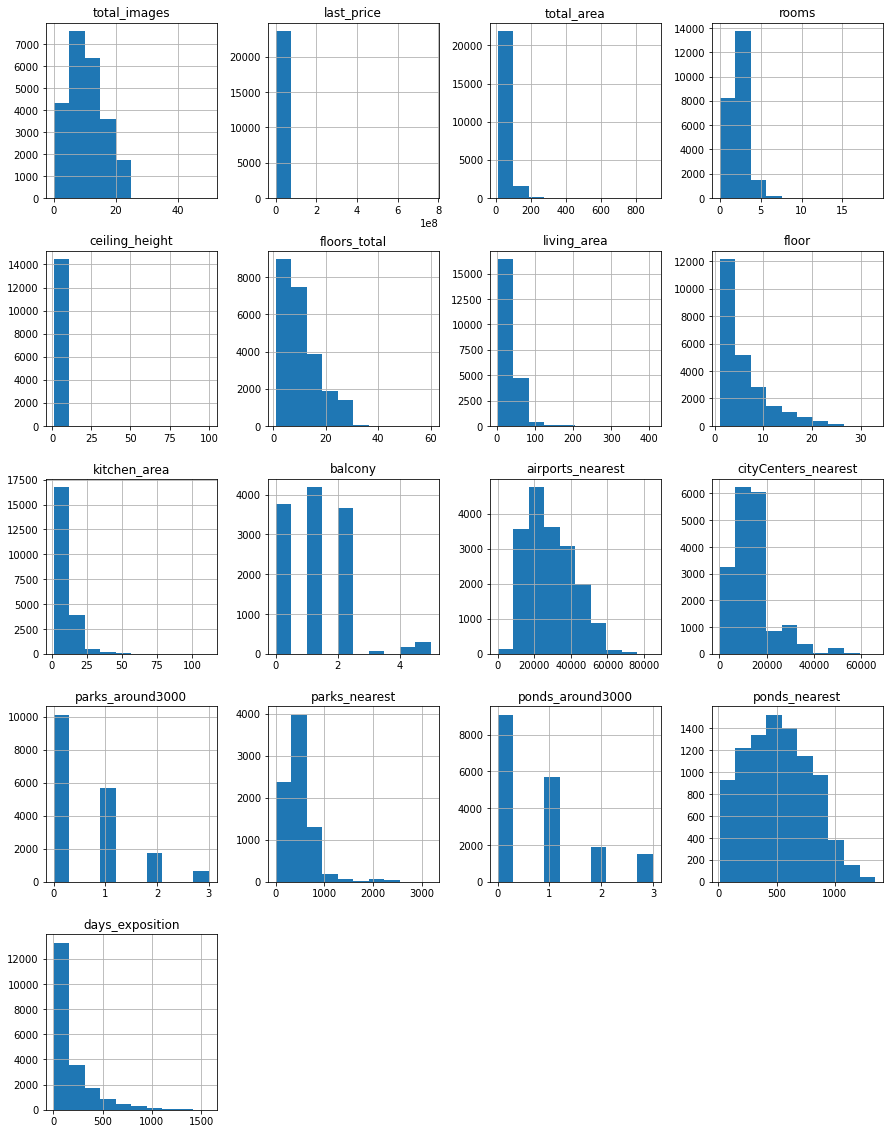

In [5]:
#визуализация колонок для большей наглядности
df.hist(figsize=(15, 20));

### Предобработка данных

#### Работа с пропусками

In [6]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Пропуски есть в 14 из 22 колонок. Первая из них - `ceiling_height` (высота потолков). Самым логичным будет заполнить пропущенные значения той высотой, которая указана в квартирах в том же населённом пункте (медианное значение).

In [7]:
#до
df.ceiling_height.isna().sum()

9195

In [8]:
#заполняем медианным значением
df.loc[df['ceiling_height'].isnull(), 'ceiling_height'] = df['ceiling_height'].median()

In [9]:
#после
df.ceiling_height.isna().sum()

0

Следующий столбец с пропущенными значениями - этажность дома (`floors_total`). Пропущенных значений - 86. Один из выходов - заполнить пропущенные значения максимальным значением этажа из всех пропусков. Так как пропусков мало это не создат выброс, мы сохраним данные (не удаляя строки), а также сохранится вариативность этажностей домов, в сравнении с тем, если бы мы взяли максимальную этажность дома как значение этажа, на котором расположена квартира.

In [10]:
#создаем переменную с максимальным значением этажа среди пропущенных значений
floors_null_max = df[df['floors_total'].isnull()]['floor'].max()
#заполняем пропуски в этажности дома значением выше
df['floors_total'] = df['floors_total'].fillna(floors_null_max)

df[df['floors_total'].isnull()]['floors_total'].count()

0

В столбце `living_area` 1903 пропуска. Самым логичным будет связать заполнение пропусков с количеством комнат. Самое маленькое значение в столбце с комнатами - 0 (студии). Жилая площадь студий и однокомнатных квартир очень похожа. 

In [11]:
df[df['rooms'] == 0].living_area.median()

18.0

In [12]:
df[df['rooms'] == 1].living_area.median()

17.6

Да и по логике даже в студии есть 1 комната, поэтому меняем нули на единицу.

In [13]:
df.loc[df['rooms']==0, 'rooms'] = 1

df[df['rooms'] == 0]['rooms'].count()

0

Теперь пропущенные значения в столбце с жилой площадью мы можем указать медианное значение по количеству комнат в квартире.

In [14]:
#создаём функцию и применем её к датафрейму
def fillna_area(col):
    rooms_count = df['rooms'].unique()
    for num in rooms_count:
        df.loc[(df['rooms'] == num) & (df[col].isnull()), col] = df[df['rooms'] == num][col].median()
    return df

df = fillna_area('living_area')

In [15]:
df[df['living_area'].isnull()]['living_area'].count()

0

В колонке `is_apartment` очень много пропусков. Вероятнее всего, если квартира имеет пропущенное значение в данном столбце, она не является апартаментами. Предположим, что все пропущенные значения показывают, что квартира не является апартаментами.

In [16]:
df['is_apartment'] = df['is_apartment'].fillna(False)

df[df['is_apartment'].isnull()]['is_apartment'].count()

0

Для заполнения пропусков в столбце `kitchen_area` пойдойдет та же функция, которую мы использовали для заполнения пропусков в столбце с жилой площадью.

In [17]:
df = fillna_area('kitchen_area')

df[df['kitchen_area'].isnull()]['kitchen_area'].count()

0

Столбец `balcony` (количество балконов) так же как и столбец с указанием апартаментов, вероятнее всего, имеет пропущенные значения в случае, если их там нет. Так как если в квартире есть хотя бы один балкон собственник это укажет. Поменяем все пропуски на ноль.

In [18]:
df['balcony'] = df['balcony'].fillna(0)

df[df['balcony'].isnull()]['balcony'].count()

0

Чтобы заполнить пропуски в столбцах `airports_nearest`, `cityCenters_nearest`, `parks_nearest` и `ponds_nearest` возьмем медианные значения по каждому населенному пункту.

In [19]:
# группировка данных по локации и вычисление медианных значений
median_values = df.pivot_table(index='locality_name', values=['airports_nearest', 'cityCenters_nearest', 'parks_nearest', 'ponds_nearest'], aggfunc='median')

# заполнение пропусков медианными значениями по локации
df = df.merge(median_values, left_on='locality_name', right_index=True, suffixes=('', '_median'), how='outer')

columns_to_fill = ['airports_nearest', 'cityCenters_nearest', 'parks_nearest', 'ponds_nearest']
for col in columns_to_fill:
    missing = df[col].isnull()
    df.loc[missing, col] = df.loc[missing, col + '_median']

# удаление временных столбцов
df = df.drop(columns=[col + '_median' for col in columns_to_fill])

In [20]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5.0,34.3,4,False,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14.0,45.0,9,False,False,False,9.5,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
7,5,7915000.0,71.6,2019-04-18T00:00:00,2,2.65,24.0,30.5,22,False,False,False,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,460.0,0.0,503.0,NaN


In [21]:
df[df['airports_nearest'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.65,12.0,14.4,5,False,False,False,9.1,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
158,15,3100000.0,47.30,2017-11-07T00:00:00,2,2.65,5.0,27.5,2,False,False,False,8.5,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,45.0
529,2,5790000.0,78.89,2017-11-26T00:00:00,3,2.65,12.0,44.5,3,False,False,False,15.0,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,21.0
746,7,2160000.0,36.00,2018-10-25T00:00:00,1,2.65,12.0,16.0,8,False,False,False,9.3,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,45.0
1121,13,3000000.0,50.40,2018-02-07T00:00:00,2,2.55,5.0,30.7,1,False,False,False,8.7,1.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,288.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22938,14,4000000.0,98.00,2018-03-15T00:00:00,4,27.00,2.0,73.0,2,True,False,False,9.0,1.0,деревня Нижняя,NaN,NaN,NaN,NaN,NaN,NaN,27.0
23048,7,2449000.0,53.60,2018-07-10T00:00:00,2,2.65,5.0,28.4,2,False,False,False,8.8,0.0,коттеджный посёлок Лесное,NaN,NaN,NaN,NaN,NaN,NaN,161.0
23354,18,900000.0,42.60,2018-02-26T00:00:00,2,2.65,2.0,28.0,1,False,False,False,9.0,0.0,деревня Тихковицы,NaN,NaN,NaN,NaN,NaN,NaN,219.0
23411,0,1100000.0,36.10,2017-06-30T00:00:00,2,2.70,2.0,24.0,1,False,False,False,5.5,0.0,деревня Борисова Грива,NaN,NaN,NaN,NaN,NaN,NaN,386.0


In [22]:
df[df['cityCenters_nearest'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.65,12.0,14.4,5,False,False,False,9.1,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
158,15,3100000.0,47.30,2017-11-07T00:00:00,2,2.65,5.0,27.5,2,False,False,False,8.5,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,45.0
529,2,5790000.0,78.89,2017-11-26T00:00:00,3,2.65,12.0,44.5,3,False,False,False,15.0,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,21.0
746,7,2160000.0,36.00,2018-10-25T00:00:00,1,2.65,12.0,16.0,8,False,False,False,9.3,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,45.0
1121,13,3000000.0,50.40,2018-02-07T00:00:00,2,2.55,5.0,30.7,1,False,False,False,8.7,1.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,288.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22938,14,4000000.0,98.00,2018-03-15T00:00:00,4,27.00,2.0,73.0,2,True,False,False,9.0,1.0,деревня Нижняя,NaN,NaN,NaN,NaN,NaN,NaN,27.0
23048,7,2449000.0,53.60,2018-07-10T00:00:00,2,2.65,5.0,28.4,2,False,False,False,8.8,0.0,коттеджный посёлок Лесное,NaN,NaN,NaN,NaN,NaN,NaN,161.0
23354,18,900000.0,42.60,2018-02-26T00:00:00,2,2.65,2.0,28.0,1,False,False,False,9.0,0.0,деревня Тихковицы,NaN,NaN,NaN,NaN,NaN,NaN,219.0
23411,0,1100000.0,36.10,2017-06-30T00:00:00,2,2.70,2.0,24.0,1,False,False,False,5.5,0.0,деревня Борисова Грива,NaN,NaN,NaN,NaN,NaN,NaN,386.0


In [23]:
df[df['parks_nearest'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11.0,18.6,1,False,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,584.5,81.0
57,7,3200000.0,45.0,2017-10-25T00:00:00,1,2.65,25.0,17.0,10,False,False,False,12.0,0.0,посёлок Шушары,13097.0,18883.0,0.0,NaN,1.0,649.0,173.0
82,3,4500000.0,80.5,2018-01-15T00:00:00,3,2.65,25.0,45.0,16,False,False,False,9.5,0.0,посёлок Шушары,12430.0,18217.0,0.0,NaN,0.0,584.5,60.0
160,9,3300000.0,41.9,2017-07-30T00:00:00,1,2.65,7.0,15.4,7,False,False,False,12.4,2.0,посёлок Шушары,18240.0,30245.0,0.0,NaN,1.0,264.0,228.0
171,6,3800000.0,49.0,2019-02-22T00:00:00,2,2.50,9.0,38.0,8,False,False,False,10.0,1.0,посёлок Шушары,18471.0,24272.0,0.0,NaN,0.0,584.5,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22938,14,4000000.0,98.0,2018-03-15T00:00:00,4,27.00,2.0,73.0,2,True,False,False,9.0,1.0,деревня Нижняя,NaN,NaN,NaN,NaN,NaN,NaN,27.0
23048,7,2449000.0,53.6,2018-07-10T00:00:00,2,2.65,5.0,28.4,2,False,False,False,8.8,0.0,коттеджный посёлок Лесное,NaN,NaN,NaN,NaN,NaN,NaN,161.0
23354,18,900000.0,42.6,2018-02-26T00:00:00,2,2.65,2.0,28.0,1,False,False,False,9.0,0.0,деревня Тихковицы,NaN,NaN,NaN,NaN,NaN,NaN,219.0
23411,0,1100000.0,36.1,2017-06-30T00:00:00,2,2.70,2.0,24.0,1,False,False,False,5.5,0.0,деревня Борисова Грива,NaN,NaN,NaN,NaN,NaN,NaN,386.0


In [24]:
df[df['ponds_nearest'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.65,12.0,14.4,5,False,False,False,9.1,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
158,15,3100000.0,47.30,2017-11-07T00:00:00,2,2.65,5.0,27.5,2,False,False,False,8.5,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,45.0
529,2,5790000.0,78.89,2017-11-26T00:00:00,3,2.65,12.0,44.5,3,False,False,False,15.0,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,21.0
746,7,2160000.0,36.00,2018-10-25T00:00:00,1,2.65,12.0,16.0,8,False,False,False,9.3,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,45.0
1121,13,3000000.0,50.40,2018-02-07T00:00:00,2,2.55,5.0,30.7,1,False,False,False,8.7,1.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,288.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22938,14,4000000.0,98.00,2018-03-15T00:00:00,4,27.00,2.0,73.0,2,True,False,False,9.0,1.0,деревня Нижняя,NaN,NaN,NaN,NaN,NaN,NaN,27.0
23048,7,2449000.0,53.60,2018-07-10T00:00:00,2,2.65,5.0,28.4,2,False,False,False,8.8,0.0,коттеджный посёлок Лесное,NaN,NaN,NaN,NaN,NaN,NaN,161.0
23354,18,900000.0,42.60,2018-02-26T00:00:00,2,2.65,2.0,28.0,1,False,False,False,9.0,0.0,деревня Тихковицы,NaN,NaN,NaN,NaN,NaN,NaN,219.0
23411,0,1100000.0,36.10,2017-06-30T00:00:00,2,2.70,2.0,24.0,1,False,False,False,5.5,0.0,деревня Борисова Грива,NaN,NaN,NaN,NaN,NaN,NaN,386.0


В вдух столбцах по непонятным причинам остались пропущенные значения, но их не так много, связаны они могут с населенным пунктом. Оставим без изменений.

Пропуски в оставшихся колонках не совсем понятно как можно заполнить на основе исходных данных. Поэтому пока перейдём к изменению типов данных.

In [25]:
df.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name             49
airports_nearest        5394
cityCenters_nearest     5394
parks_around3000        5518
parks_nearest           6032
ponds_around3000        5518
ponds_nearest           5518
days_exposition         3181
dtype: int64

#### Изменение типов данных

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23699 entries, 0 to 23683
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23699 non-null  float64
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Колонка `first_day_exposition` должна быть в формате даты, `is_apartment` в булевом формате, а столбцы `floors_total`, `balcony`, `parks_around3000`, `ponds_around3000` и `days_exposition` в целочисленном формате.

Так как в столбцах `parks_around3000`, `ponds_around3000` и `days_exposition` мы не заполняли пропуски, для изменения типа данных стоит поменять пропуски на нули.

In [27]:
df['parks_around3000'] = df['parks_around3000'].fillna(0)
df['ponds_around3000'] = df['ponds_around3000'].fillna(0)
# df['days_exposition'] = df['days_exposition'].fillna(0)

In [28]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

df['is_apartment'] = df['is_apartment'].astype('bool')

df['floors_total'] = df['floors_total'].astype('int')
df['balcony'] = df['balcony'].astype('int')
df['parks_around3000'] = df['parks_around3000'].astype('int')
df['ponds_around3000'] = df['ponds_around3000'].astype('int')
# df['days_exposition'] = df['days_exposition'].astype('int')
df['days_exposition'] = np.floor(pd.to_numeric(df['days_exposition'], errors='coerce')).astype('Int64')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23699 entries, 0 to 23683
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23699 non-null  int64         
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

#### Проверка на дубликаты

Прежде всего посмотрим на явные дубликаты

In [29]:
df.duplicated().sum()

0

Явных дубликатов не оказалось, поэтому для проверки на неявные дубликаты посмотрим на уникальные значения столбца `locality_name`

In [30]:
df['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Можно заметить, что где-то слово посёлок написано через е, а где-то через ё. Исправим это:

In [31]:
df['locality_name'] = df['locality_name'].replace('ё', 'е')

В целом мы насколько смогли предобработали первоначальные данные. Приступим к следующему этапу.

### Посчитайте и добавьте в таблицу новые столбцы

Нужно добавить столбцы со следующими данными:
1. цена одного квадратного метра;
2. день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
3. месяц публикации объявления;
4. год публикации объявления;
5. тип этажа квартиры (значения — «‎первый», «последний», «другой»);
6. расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).

In [32]:
# цена за квадратный метр:
df['square_meter_price'] = round(df['last_price'] / df['total_area'], 2)

In [33]:
# день недели, месяц и год публикации:
df['weekday'] = df['first_day_exposition'].dt.weekday
df['month'] = df['first_day_exposition'].dt.month
df['year'] = df['first_day_exposition'].dt.year

In [34]:
# тип этажа квартиры(первый, последний или другой):
def floor_type(row):
    total = row['floors_total']
    specific = row['floor']
    
    if total / specific == total:
        return 'первый'
    elif total / specific == 1:
        return 'последний'
    else:
        return 'другой'
    
df['floor_type'] = df.apply(floor_type, axis=1)

In [35]:
# расстояние до центра города
df['cityCenters_nearest_km'] = round(df['cityCenters_nearest'] / 1000, 0)

In [36]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,weekday,month,year,floor_type,cityCenters_nearest_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,<NA>,120370.37,3,3,2019,другой,16.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558,92785.71,3,8,2015,другой,14.0
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,45.0,9,False,False,False,9.5,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424,408176.10,4,7,2015,другой,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121,100000.00,1,6,2018,другой,8.0
7,5,7915000.0,71.6,2019-04-18,2,2.65,24,30.5,22,False,False,False,18.9,2,Санкт-Петербург,23982.0,11634.0,0,460.0,0,503.0,<NA>,110544.69,3,4,2019,другой,12.0


Приступим к самому исследовательскому анализу данных.

### Проведите исследовательский анализ данных

#### Общий анализ данных

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64


<AxesSubplot:>

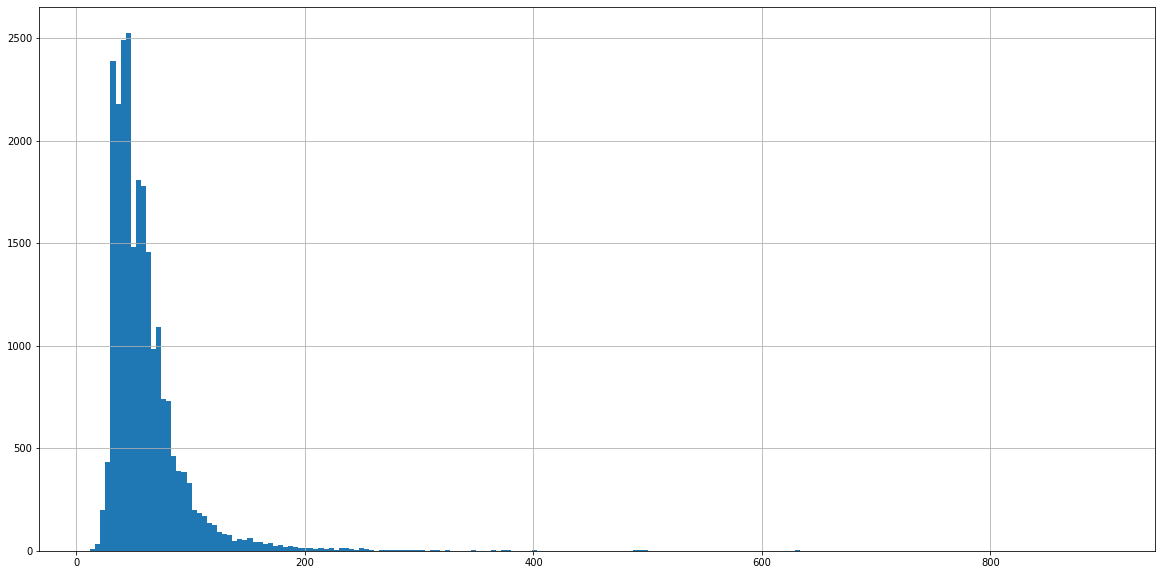

In [37]:
# площадь квартиры
print(df['total_area'].describe())
df['total_area'].hist(bins=200, figsize=(20, 10))

Квартир более 200 метров очень мало, построим гистограмму со значениями до 200 кв метров.

<AxesSubplot:>

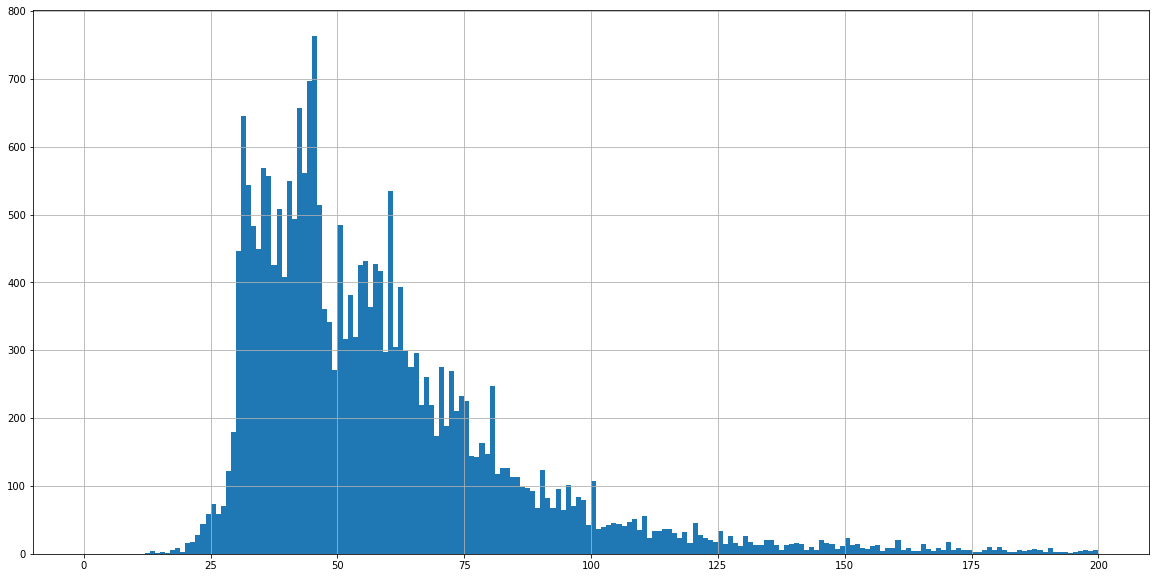

In [38]:
df['total_area'].hist(bins=200, figsize=(20, 10), range=(0, 200))

Самое большое количество квартир со значением около 40 кв метров. 

count    23699.000000
mean        34.321745
std         21.700806
min          2.000000
25%         18.400000
50%         30.300000
75%         42.700000
max        409.700000
Name: living_area, dtype: float64


<AxesSubplot:>

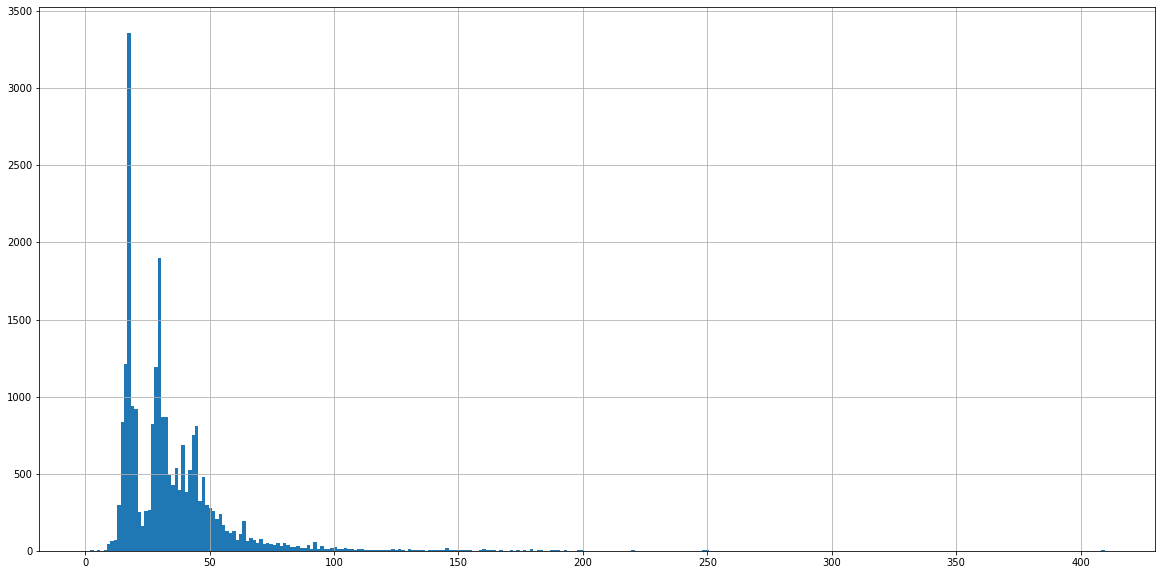

In [39]:
# жилая площадь
print(df['living_area'].describe())
df['living_area'].hist(bins=300, figsize=(20, 10))

Жилая площадь обычно не превышает площадь 100 кв м, посмотрим на гистограмму от 0 до 100 кв м.

<AxesSubplot:>

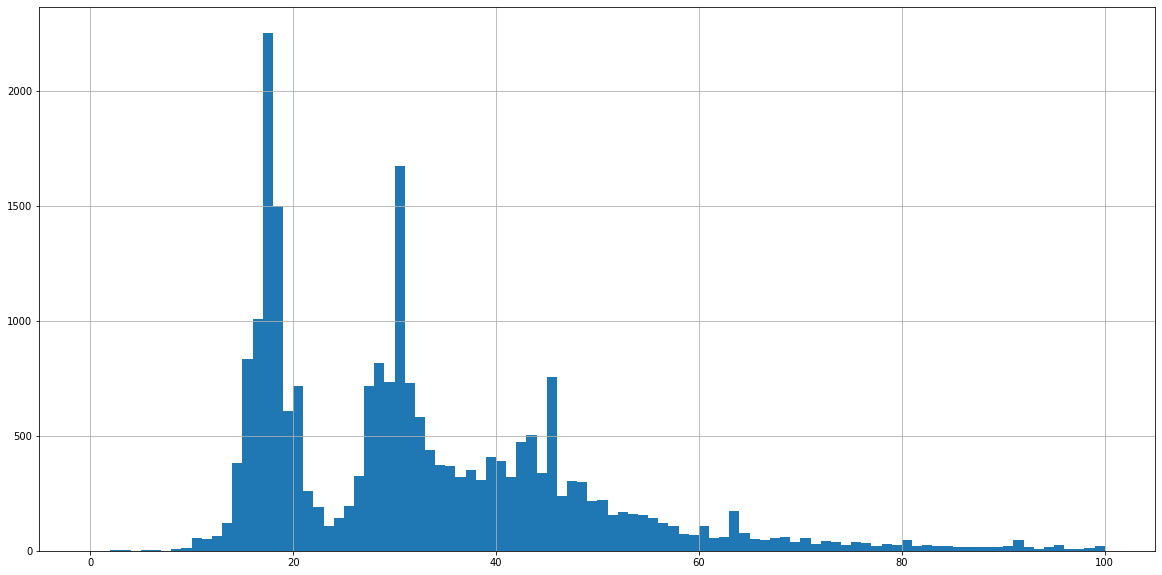

In [40]:
df['living_area'].hist(bins=100, figsize=(20, 10), range=(0, 100))

Видно, что больше всего квартир имеют жилую площадь около 18 кв м.

count    23699.000000
mean        10.452660
std          5.642179
min          1.300000
25%          7.400000
50%          9.040000
75%         11.500000
max        112.000000
Name: kitchen_area, dtype: float64


<AxesSubplot:>

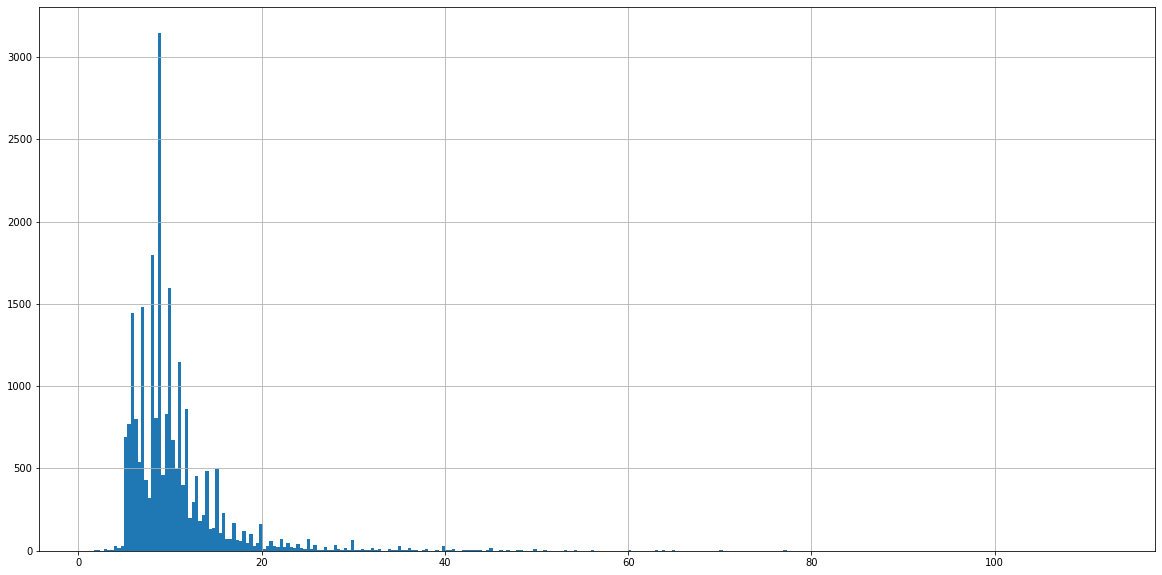

In [41]:
# площадь кухни
print(df['kitchen_area'].describe())
df['kitchen_area'].hist(bins=300, figsize=(20, 10))

<AxesSubplot:>

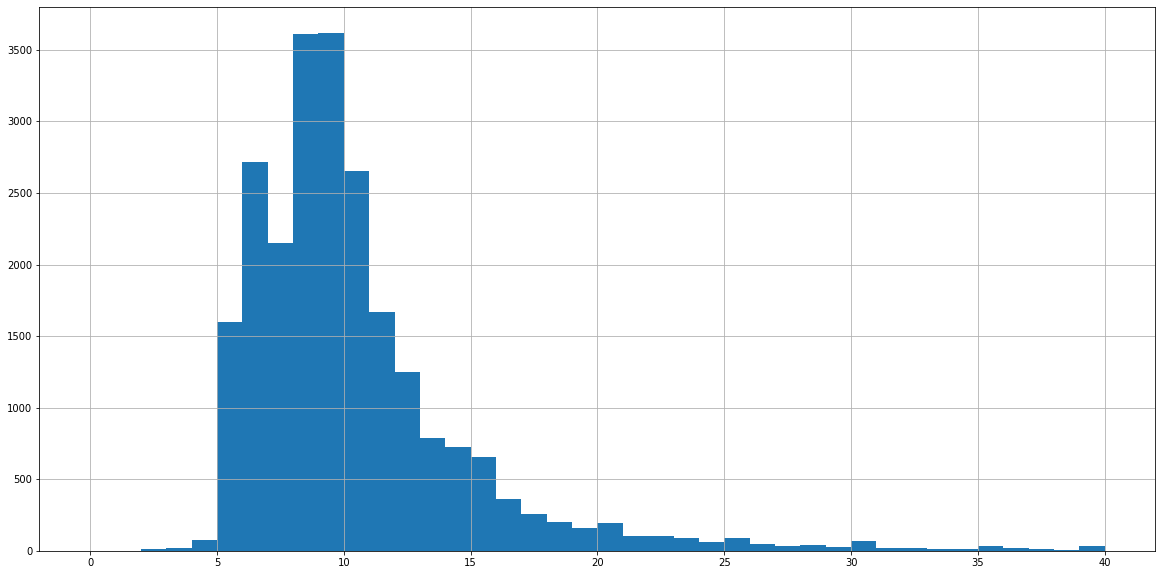

In [42]:
df['kitchen_area'].hist(bins=40, figsize=(20, 10), range=(0, 40))

Больше всего квартир имеют площадь кухни 9 кв м. 

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64


<AxesSubplot:>

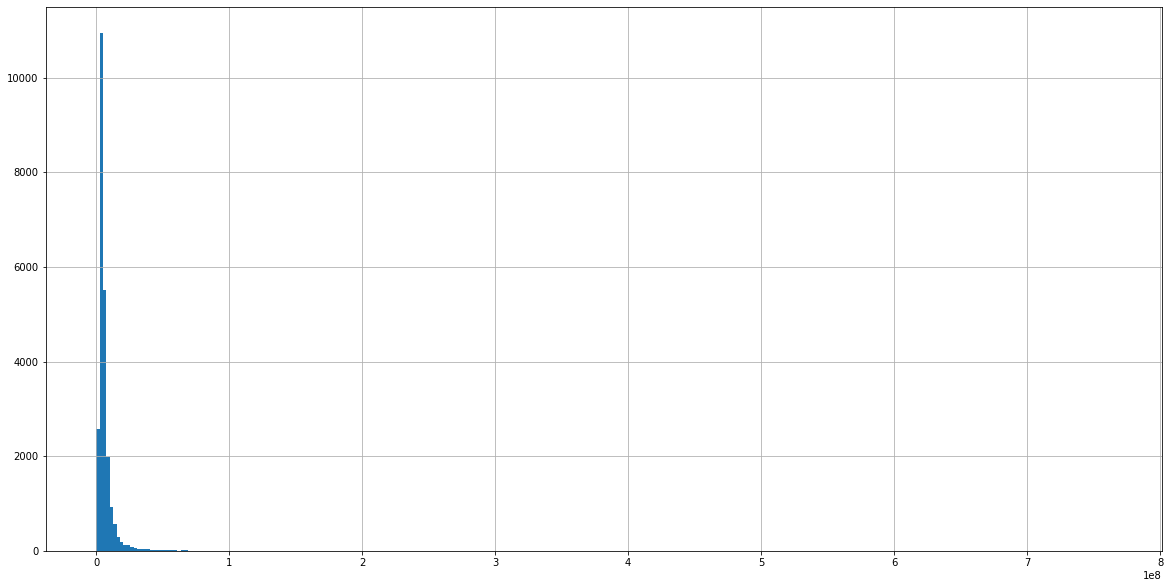

In [43]:
# цена объекта
print(df['last_price'].describe())
df['last_price'].hist(bins=300, figsize=(20, 10))

<AxesSubplot:>

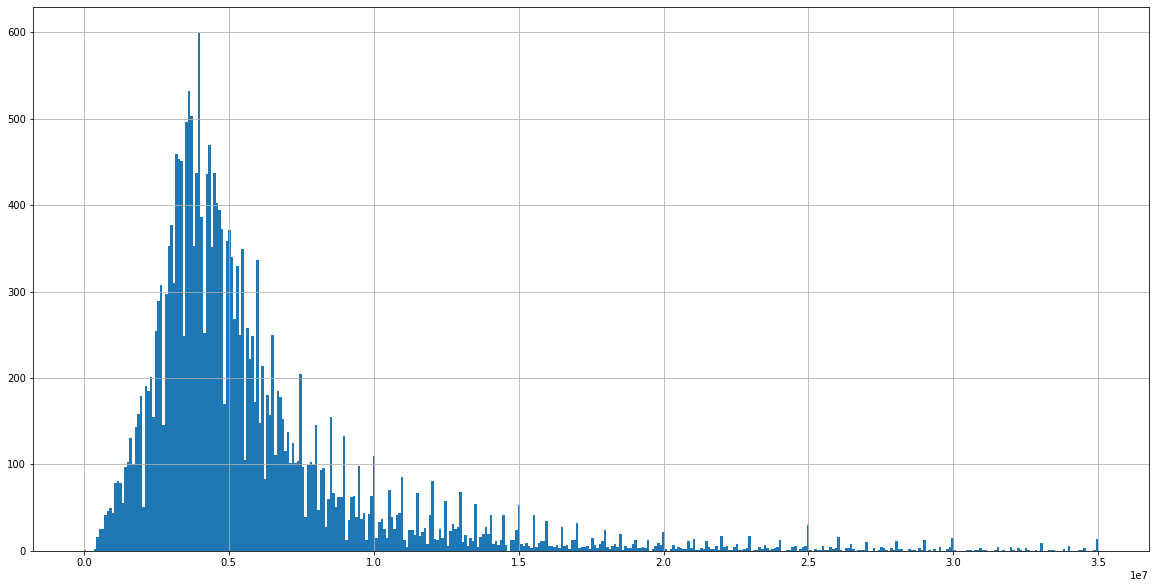

In [44]:
df['last_price'].hist(bins=400, figsize=(20, 10), range=(0, 35000000))

Мы можем заметить, что цены на квартиры совершенно разные. Но большее число квартир имеют стоимость около 4 млн рублей.

count    23699.000000
mean         2.078948
std          1.066196
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64


<AxesSubplot:>

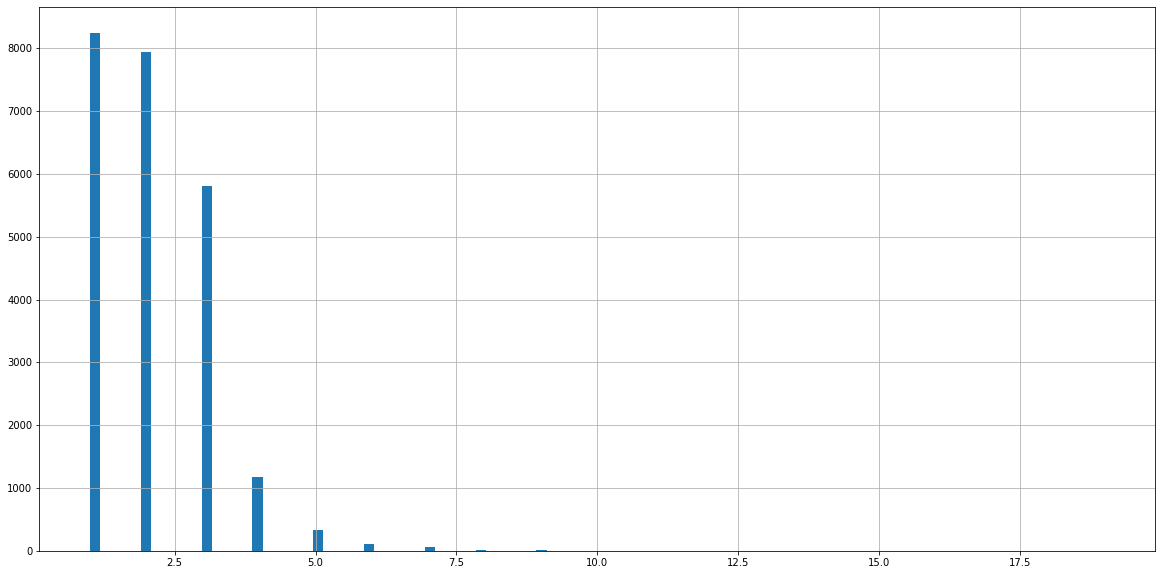

In [45]:
# количество комнат
print(df['rooms'].describe())
df['rooms'].hist(bins=100, figsize=(20, 10))

В основном количество комнат не превышает значение 5. Посмотрим гистаграмму со значением до 8.

<AxesSubplot:>

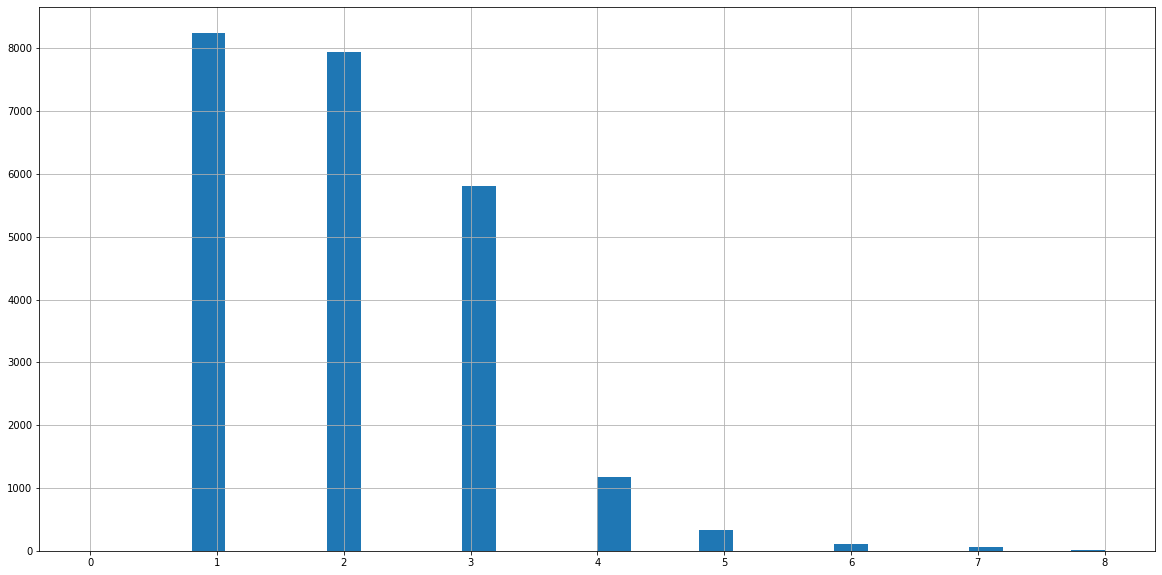

In [46]:
df['rooms'].hist(bins=30, figsize=(20, 10), range=(0, 8))

Ранее мы убрали значение 0, так как логически студии можно считать квартирами с 1 комнатой. Сейчас мы можем сказать, что больше всего квартир, в которых 1 комната и практически столько же двухкомнатных.

count    23699.000000
mean         2.724358
std          0.988298
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64


<AxesSubplot:>

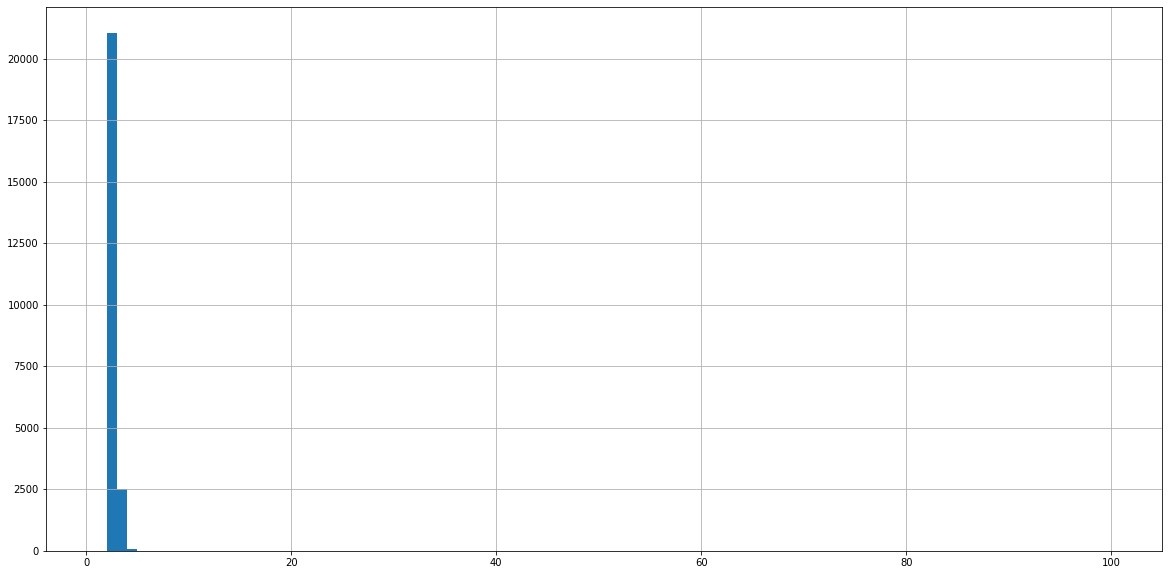

In [47]:
# высота потолков
print(df['ceiling_height'].describe())
df['ceiling_height'].hist(bins=100, figsize=(20, 10))

так как высота потолков не может быть меньше 2 метров и скорее всего больше 4 метров, построим новую гистограмму.

<AxesSubplot:>

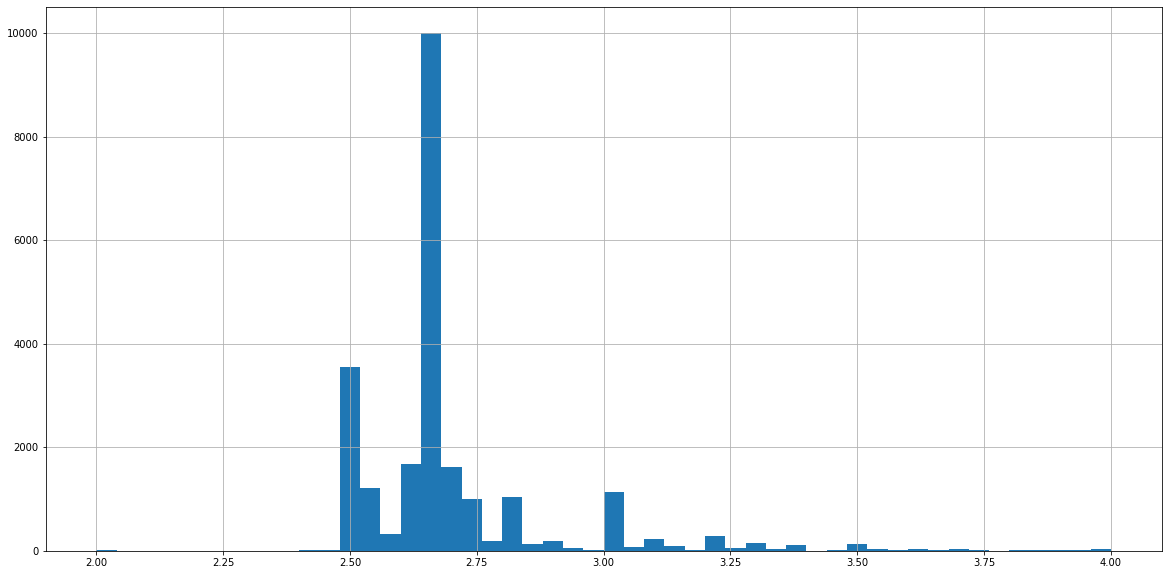

In [48]:
df['ceiling_height'].hist(bins=50, figsize=(20, 10), range=(2, 4))

Больше всего квартир с высотой потолков около 2,6 метров, но достаточно много квартир с высотой больше и меньше данного значения.

count    23699.000000
mean         5.892358
std          4.885249
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64


<AxesSubplot:>

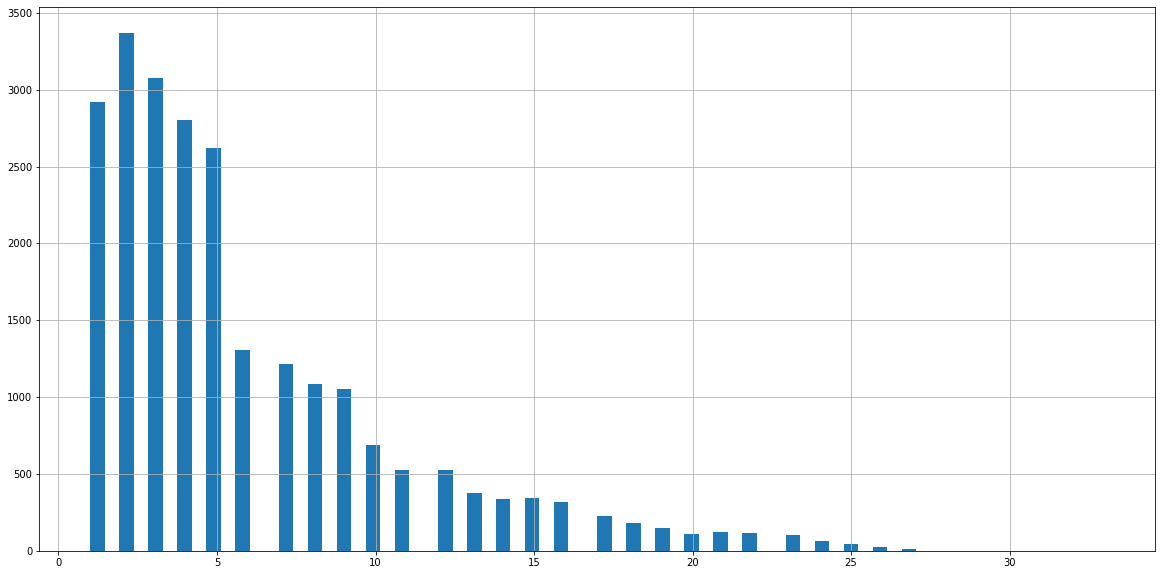

In [49]:
# этаж квартиры
print(df['floor'].describe())
df['floor'].hist(bins=70, figsize=(20, 10))

Больше всего квартир распологается на 2 этаже.

count      23699
unique         3
top       другой
freq       17444
Name: floor_type, dtype: object


<AxesSubplot:>

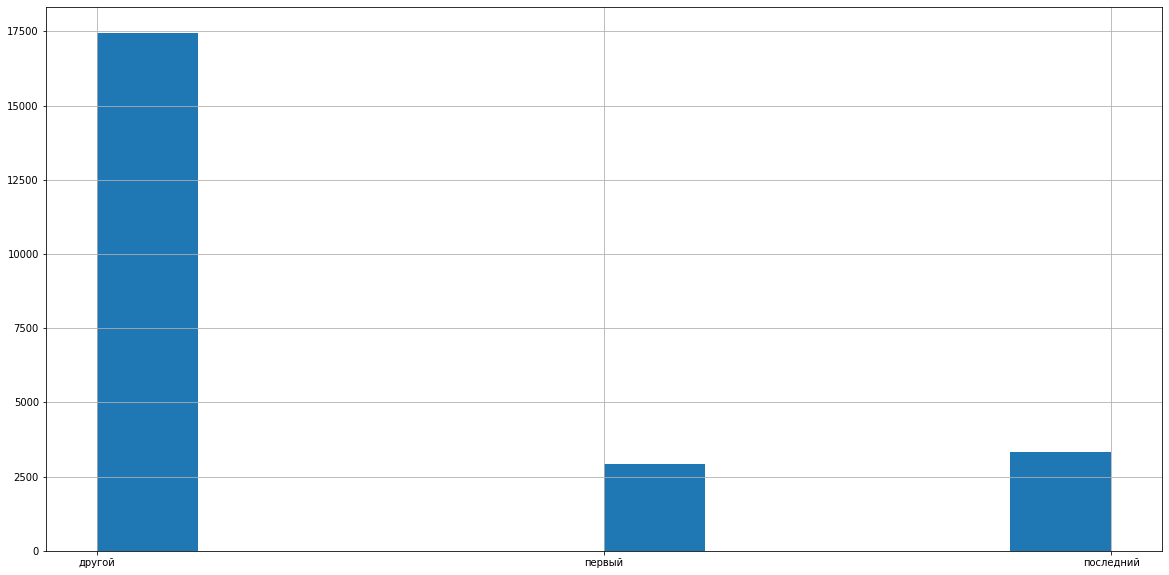

In [50]:
# тип этажа квартиры
print(df['floor_type'].describe())
df['floor_type'].hist(bins=10, figsize=(20, 10))

Квартир на последнем этаже больше, чем на первом, но, логично, что основное количество квартир расположены на на первом и не на последнем этаже.

count    23699.000000
mean        10.722182
std          6.633768
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64


<AxesSubplot:>

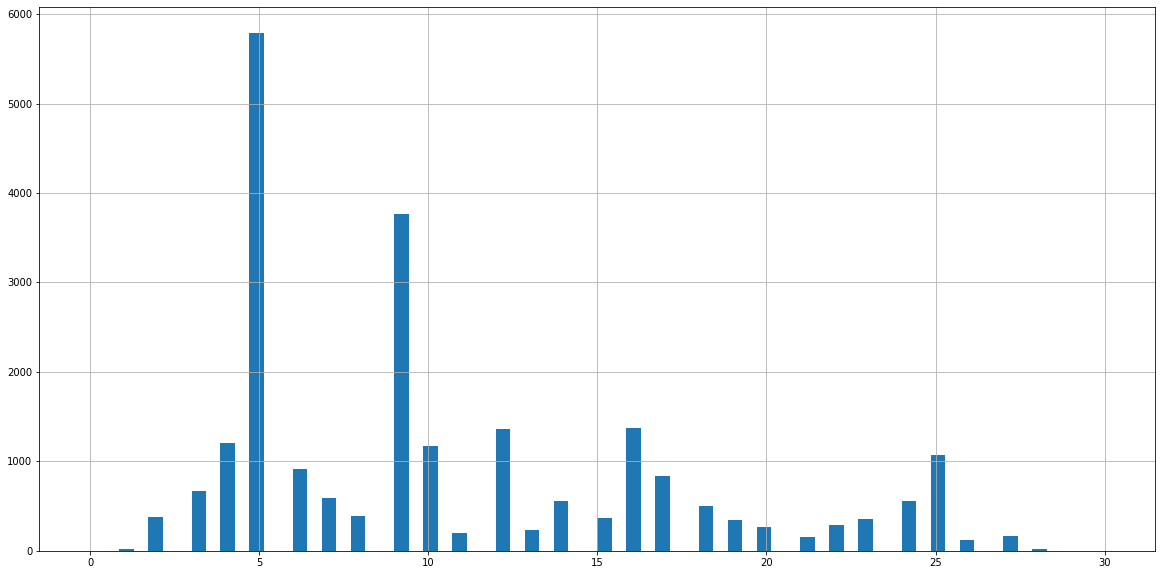

In [51]:
# общее количество этажей в доме
print(df['floors_total'].describe())
df['floors_total'].hist(bins=70, figsize=(20, 10), range=(0, 30))

Больше всего домов с 5 и 9 этажами. Более высокие дома, скорее всего новостройки, а основное количество домов в СПб и Ленинградской области как раз имеют 5 или 9 этажей.

count    18305.000000
mean     14231.683201
std       8625.989235
min        181.000000
25%       9274.000000
50%      13101.000000
75%      16326.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64


<AxesSubplot:>

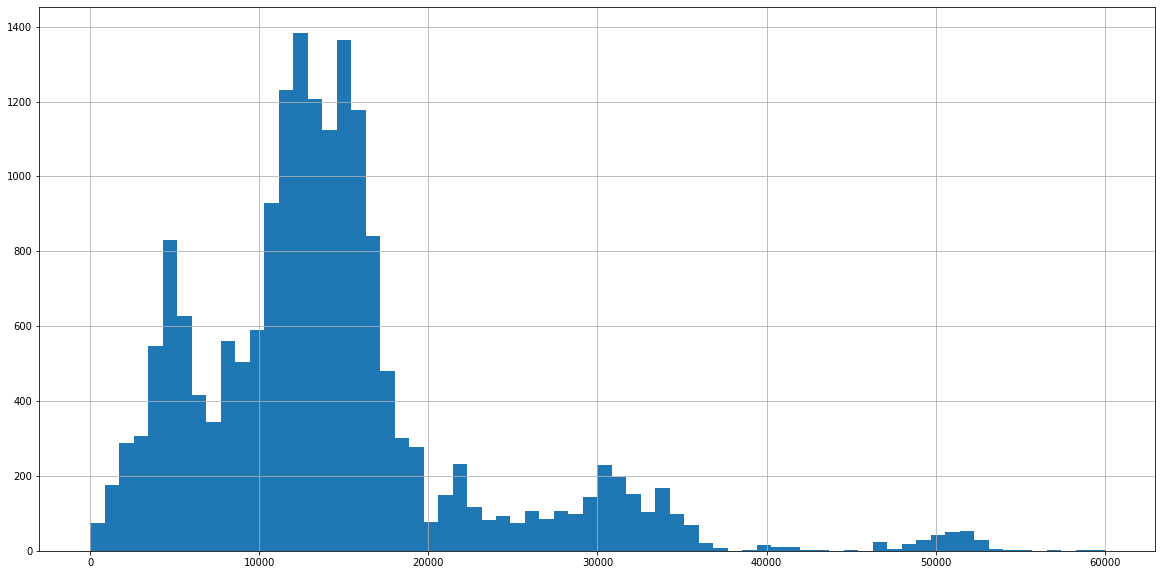

In [52]:
# расстояние до центра города в метрах
print(df['cityCenters_nearest'].describe())
df['cityCenters_nearest'].hist(bins=70, figsize=(20, 10), range=(0, 60000))

В среднем квартиры расположены в 13000 м (13 км) от центра города.

count    18305.000000
mean     28864.048184
std      12673.634680
min          0.000000
25%      18641.000000
50%      26757.500000
75%      37313.000000
max      84869.000000
Name: airports_nearest, dtype: float64


<AxesSubplot:>

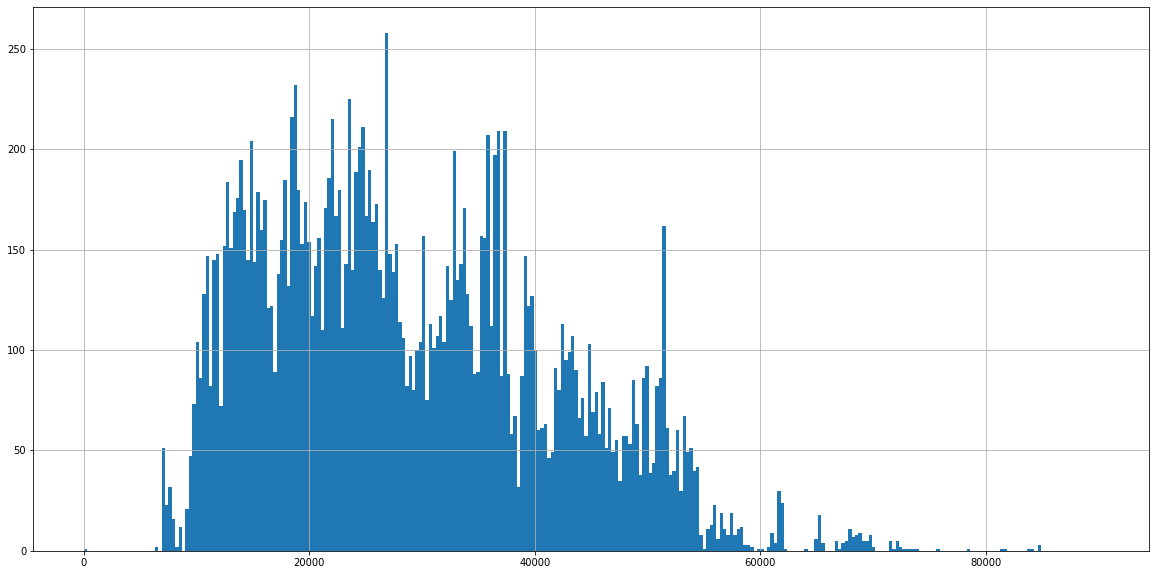

In [53]:
# расстояние до ближайшего аэропорта
print(df['airports_nearest'].describe())
df['airports_nearest'].hist(bins=300, figsize=(20, 10), range=(0, 90000))

Больше всего квартир расположены на расстоянии около 27 км от ближайшего аэропорта

count    17667.000000
mean       475.966972
std        235.604308
min          1.000000
25%        428.500000
50%        460.000000
75%        460.000000
max       3190.000000
Name: parks_nearest, dtype: float64


<AxesSubplot:>

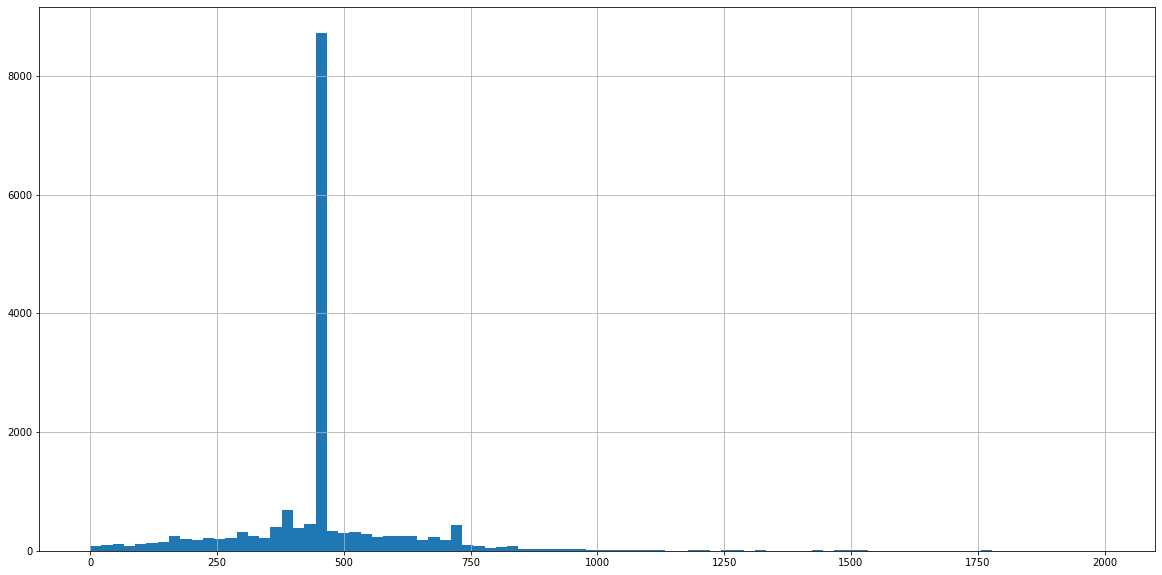

In [54]:
# расстояние до ближайшего парка
print(df['parks_nearest'].describe())
df['parks_nearest'].hist(bins=90, figsize=(20, 10), range=(0, 2000))

Около большинства квартир на расстоянии примерно 470 м расположен парк.

count    23699.000000
mean         2.569307
std          1.789082
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: weekday, dtype: float64


<AxesSubplot:>

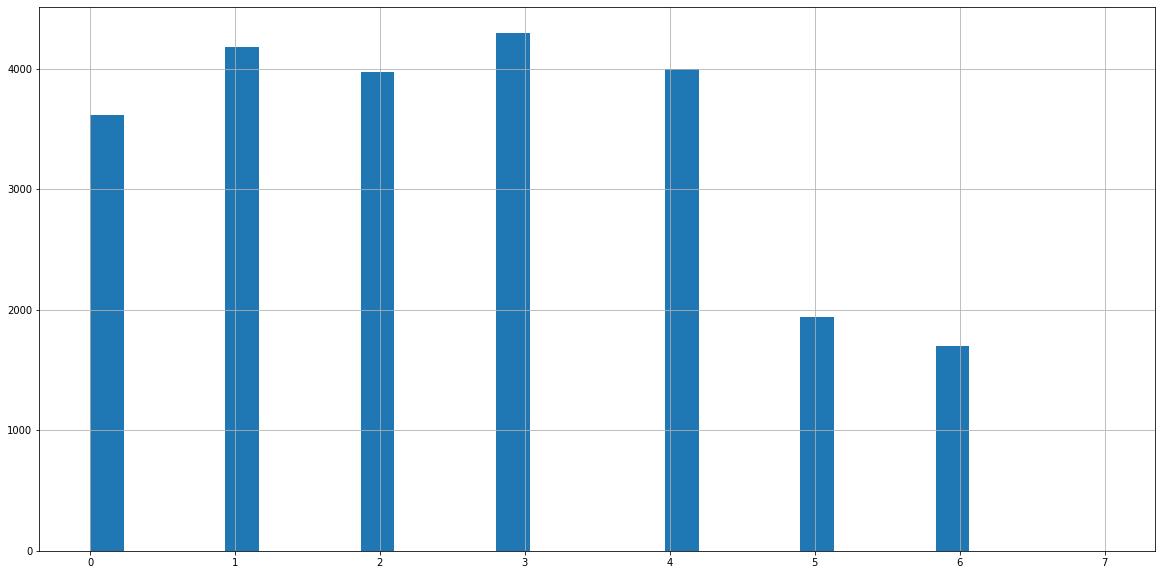

In [55]:
# день и месяц публикации объявления
print(df['weekday'].describe())
df['weekday'].hist(bins=30, figsize=(20, 10), range=(0, 7))

count    23699.000000
mean         6.400101
std          3.491561
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month, dtype: float64


<AxesSubplot:>

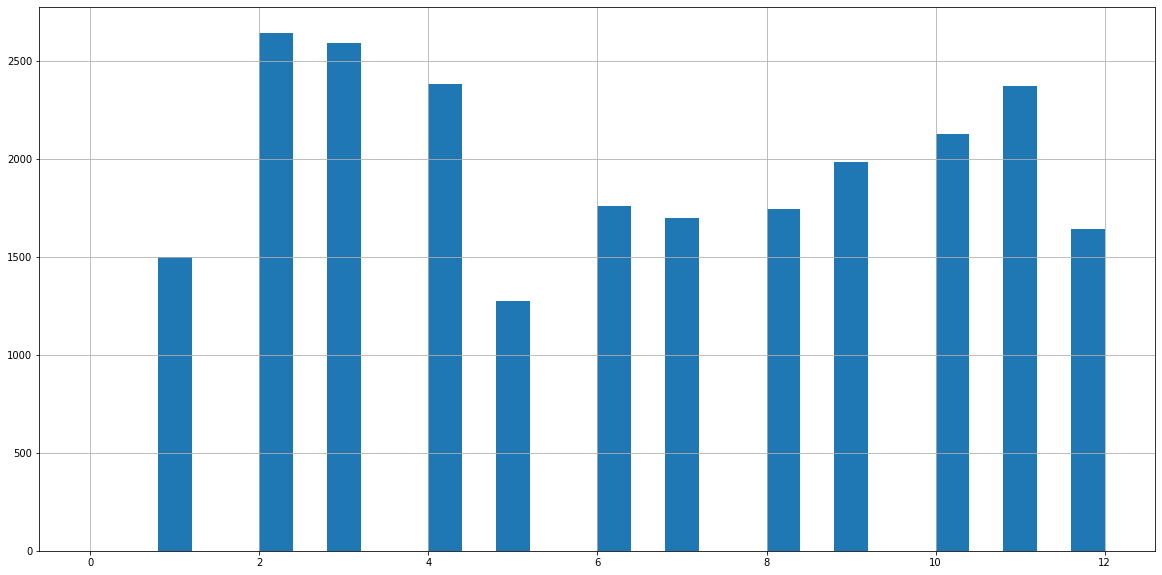

In [56]:
print(df['month'].describe())
df['month'].hist(bins=30, figsize=(20, 10), range=(0, 12))

Большинство квартир выставляют на продажу в будние дни (а больше всего во вторник и четверг). В начале года квартиры продают больше (февраль, март, апрель), а также ближе к концу года (октябрь, ноябрь).

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Ты корректно подбираешь основные диапазоны, а также верно читаешь графики! 
</div>

In [57]:
df['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

(-100.0, 600.0)

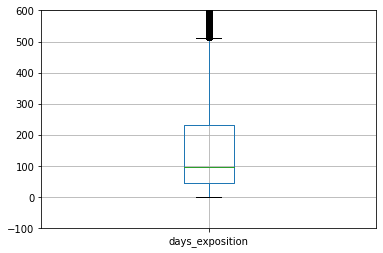

In [58]:
import matplotlib.pyplot as plt

df.boxplot('days_exposition')
plt.ylim(-100, 600)

Медиана составляет 75 дней, это означает, что в среднем квартиры продаются за 2,5 месяца. Есть значение 0 на нижнем усе межквартильного размаха, которое говорит о том, что есть квартиры, которые продались день в день, но верхний ус межквартильного размаха находится на отметке в 480 днях, что говорит о том, что некоторые квартиры продаются крайне долго. Среднее и медианное значение достаточно сильно отличаются, что говорит о возможных выбросах.

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23699 entries, 0 to 23683
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            23699 non-null  int64         
 1   last_price              23699 non-null  float64       
 2   total_area              23699 non-null  float64       
 3   first_day_exposition    23699 non-null  datetime64[ns]
 4   rooms                   23699 non-null  int64         
 5   ceiling_height          23699 non-null  float64       
 6   floors_total            23699 non-null  int64         
 7   living_area             23699 non-null  float64       
 8   floor                   23699 non-null  int64         
 9   is_apartment            23699 non-null  bool          
 10  studio                  23699 non-null  bool          
 11  open_plan               23699 non-null  bool          
 12  kitchen_area            23699 non-null  float6

После анализа мы можем убрать выбивающиеся и аномальные значения.

In [60]:
df = df.query(
    
    'total_area <= 200 \
    and rooms <= 5 \
    and 2 <= ceiling_height <= 4 \
    and last_price <= 30000000 \
    and days_exposition <= 500'
    
)

In [61]:
df.reset_index(drop=True)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,weekday,month,year,floor_type,cityCenters_nearest_km
0,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121,100000.00,1,6,2018,другой,8.0
1,18,5400000.0,61.0,2017-02-26,3,2.50,9,43.6,7,False,False,False,6.5,2,Санкт-Петербург,50898.0,15008.0,0,460.0,0,503.0,289,88524.59,6,2,2017,другой,15.0
2,5,5050000.0,39.6,2017-11-16,1,2.67,12,20.3,3,False,False,False,8.5,0,Санкт-Петербург,38357.0,13878.0,1,310.0,2,553.0,137,127525.25,3,11,2017,другой,14.0
3,16,4650000.0,39.0,2017-11-18,1,2.65,14,20.5,5,False,False,False,7.6,1,Санкт-Петербург,12900.0,14259.0,1,590.0,1,296.0,19,119230.77,5,11,2017,другой,14.0
4,11,6700000.0,82.0,2017-11-23,3,3.05,5,55.6,1,False,False,False,9.0,0,Санкт-Петербург,22108.0,10698.0,3,420.0,0,503.0,397,81707.32,3,11,2017,первый,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18427,9,980000.0,54.0,2017-12-09,2,2.65,1,30.5,1,False,False,False,8.8,0,поселок Пчевжа,NaN,NaN,0,NaN,0,NaN,45,18148.15,5,12,2017,первый,NaN
18428,8,799000.0,47.2,2018-06-16,2,2.65,5,30.6,3,False,False,False,6.3,1,поселок Володарское,NaN,NaN,0,NaN,0,NaN,5,16927.97,5,6,2018,другой,NaN
18429,7,2449000.0,53.6,2018-07-10,2,2.65,5,28.4,2,False,False,False,8.8,0,коттеджный посёлок Лесное,NaN,NaN,0,NaN,0,NaN,161,45690.30,1,7,2018,другой,NaN
18430,18,900000.0,42.6,2018-02-26,2,2.65,2,28.0,1,False,False,False,9.0,0,деревня Тихковицы,NaN,NaN,0,NaN,0,NaN,219,21126.76,0,2,2018,первый,NaN


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18432 entries, 4 to 23411
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            18432 non-null  int64         
 1   last_price              18432 non-null  float64       
 2   total_area              18432 non-null  float64       
 3   first_day_exposition    18432 non-null  datetime64[ns]
 4   rooms                   18432 non-null  int64         
 5   ceiling_height          18432 non-null  float64       
 6   floors_total            18432 non-null  int64         
 7   living_area             18432 non-null  float64       
 8   floor                   18432 non-null  int64         
 9   is_apartment            18432 non-null  bool          
 10  studio                  18432 non-null  bool          
 11  open_plan               18432 non-null  bool          
 12  kitchen_area            18432 non-null  float6

#### Влияние факторов на стоимость квартиры 

In [63]:
# создаём отдельный датафрейм с нужными колонками
df_price = df[['last_price', 'living_area', 'kitchen_area', 'rooms', 'floor_type', 'weekday', 'month', 'year']]
df_price

,last_price,living_area,kitchen_area,rooms,floor_type,weekday,month,year
4,10000000.0,32.0,41.0,2,другой,1,6,2018
9,5400000.0,43.6,6.5,3,другой,6,2,2017
10,5050000.0,20.3,8.5,1,другой,3,11,2017
15,4650000.0,20.5,7.6,1,другой,5,11,2017
16,6700000.0,55.6,9.0,3,первый,3,11,2017
...,...,...,...,...,...,...,...,...
22841,980000.0,30.5,8.8,2,первый,5,12,2017
22935,799000.0,30.6,6.3,2,другой,5,6,2018
23048,2449000.0,28.4,8.8,2,другой,1,7,2018
23354,900000.0,28.0,9.0,2,первый,0,2,2018


In [64]:
# переведем тип этажа в категориальную переменную
df_price['floor_type'] = df_price['floor_type'].replace({'первый': 1, 'другой': 2, 'последний': 3})
df_price

/tmp/ipykernel_764/2896894106.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_price['floor_type'] = df_price['floor_type'].replace({'первый': 1, 'другой': 2, 'последний': 3})


,last_price,living_area,kitchen_area,rooms,floor_type,weekday,month,year
4,10000000.0,32.0,41.0,2,2,1,6,2018
9,5400000.0,43.6,6.5,3,2,6,2,2017
10,5050000.0,20.3,8.5,1,2,3,11,2017
15,4650000.0,20.5,7.6,1,2,5,11,2017
16,6700000.0,55.6,9.0,3,1,3,11,2017
...,...,...,...,...,...,...,...,...
22841,980000.0,30.5,8.8,2,1,5,12,2017
22935,799000.0,30.6,6.3,2,2,5,6,2018
23048,2449000.0,28.4,8.8,2,2,1,7,2018
23354,900000.0,28.0,9.0,2,1,0,2,2018


In [65]:
df_price_cat = df_price[['last_price', 'living_area', 'kitchen_area', 'rooms']]
df_price_cat.corr().style.background_gradient('coolwarm')

,last_price,living_area,kitchen_area,rooms
last_price,1.000000,0.630111,0.561228,0.477124
living_area,0.630111,1.000000,0.276258,0.886438
kitchen_area,0.561228,0.276258,1.000000,0.158172
rooms,0.477124,0.886438,0.158172,1.000000


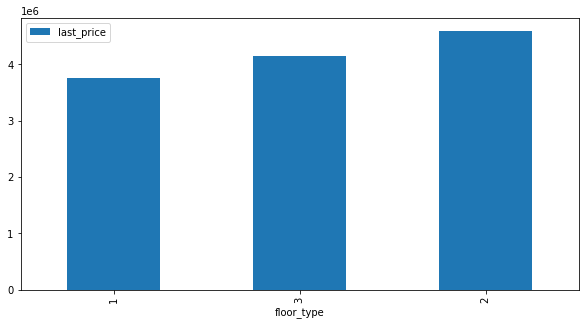

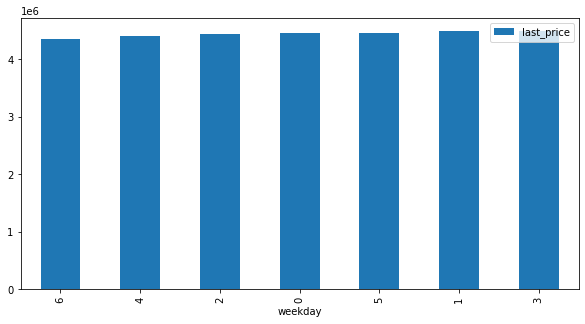

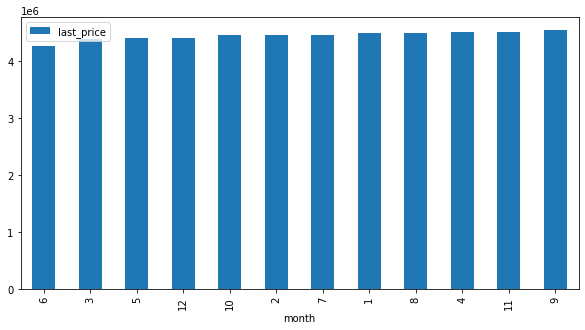

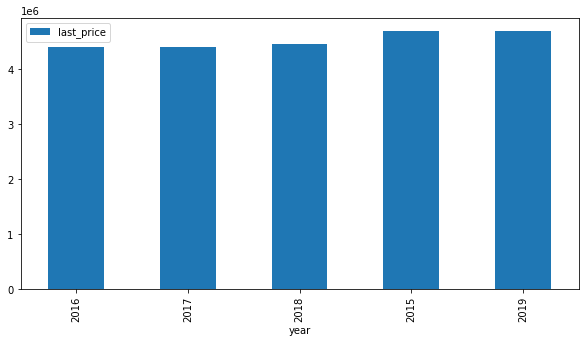

In [66]:
df_price_cat2 = ['floor_type', 'weekday', 'month', 'year']

for name in df_price_cat2:
    (df_price
 .pivot_table(index=name, values='last_price', aggfunc='median')
 .sort_values(by='last_price')
 .plot(y='last_price', kind='bar', figsize=(10, 5))
)

Построив матрицы корреляции можно сказать насколько одна переменная зависит от значения другой. Если корреляция близка к 1, то при повышении одной переменной повышается и другая. Если значение корреляции приближается к -1, то при повышении одной переменной, другая будет уменьшаться. Главное, что нам стоит учитывать, это то, что если число по модулю большое, то переменные взаимосвязаны.  
  
Нам надо узнать насколько данные переменные влияют на стоимость. Больше всего корреляция у цены с жилой площадью, что выглядит достаточно логично. Также достаточно сильно влияет на стоимость площадь кухни и немного меньше количество комнат.   
  
Самые дорогие квартиры находятся не на первом и не на последнем этаже, при этом стоимость квартир на последнем этаже выше, чем на последнем.

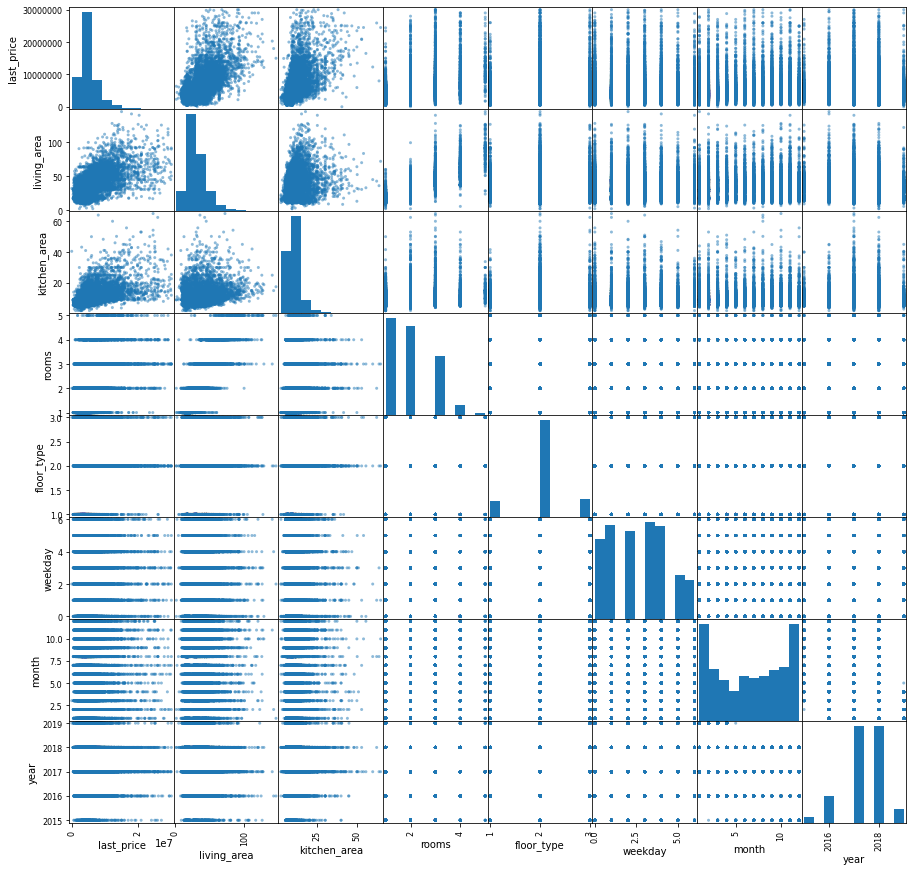

In [67]:
# выведем графики зависимостей
pd.plotting.scatter_matrix(df_price, figsize=(15, 15));

Для определения влияния переменных на стоимость рассмотрим первую строку таблицы.
  
1. График распределения по цене, где видно, что основное количество квартир стоит 4 млн.
2. Высокая корреляция стоимости и жилой площади подтверждается данным графиком, с увеличением площади увеличивается и стоимость.
3. Та же ситуация и с площадью кухни, но корреляция и скопление значений немного ниже, но также можно наблюдать линейность.   
4. Все остальные переменные не показывают никакой связи и влияния переменных на стоимость.
5. Квартиры на первом этаже самые дешёвые, далее по стоимости квартиры на последнем этаже, этажи между самые дорогие.

#### Топ-10 населённых пунктов

In [68]:
# выделение средней цены 10 населённых пунктов с наибольшим числом объявлений
df_cities = (
    df
    .pivot_table(index='locality_name', aggfunc={'last_price':'count', 'square_meter_price':'mean'})
    .sort_values(by='last_price', ascending=False)
    .head(10)
            )
df_cities

,last_price,square_meter_price
locality_name,,
Санкт-Петербург,12108,108272.308209
посёлок Мурино,483,86042.358323
посёлок Шушары,385,77938.483740
Всеволожск,307,68542.224560
Колпино,292,74671.949384
посёлок Парголово,286,89360.980594
Пушкин,275,101797.625273
деревня Кудрово,266,92656.981541
Гатчина,243,68076.898848


<AxesSubplot:xlabel='locality_name'>

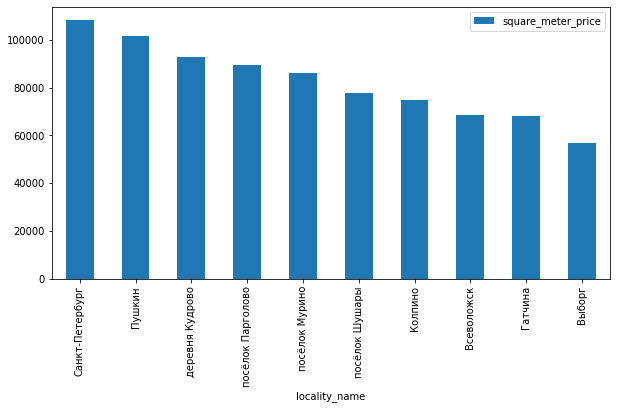

In [69]:
(df_cities
    .sort_values(by='square_meter_price', ascending=False)
    .plot(y='square_meter_price', kind='bar', figsize=(10, 5))
)

Больше всего стоимость одного квадратного метра в Санкт-Петербурге. Другие 9 населённых пунктов в этом списке находятся рядом с Санкт-Петербургом, а возможно в будущем в рамках агломерации станут частью Санкт-Петербурга. Самая низка стоимость за квадратный метр жилья в Выборге.

#### Анализ цен в Санкт-Петербурге

Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города.

In [70]:
df_spb = df[df['locality_name'] == 'Санкт-Петербург']
df_spb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12108 entries, 4 to 23690
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            12108 non-null  int64         
 1   last_price              12108 non-null  float64       
 2   total_area              12108 non-null  float64       
 3   first_day_exposition    12108 non-null  datetime64[ns]
 4   rooms                   12108 non-null  int64         
 5   ceiling_height          12108 non-null  float64       
 6   floors_total            12108 non-null  int64         
 7   living_area             12108 non-null  float64       
 8   floor                   12108 non-null  int64         
 9   is_apartment            12108 non-null  bool          
 10  studio                  12108 non-null  bool          
 11  open_plan               12108 non-null  bool          
 12  kitchen_area            12108 non-null  float6

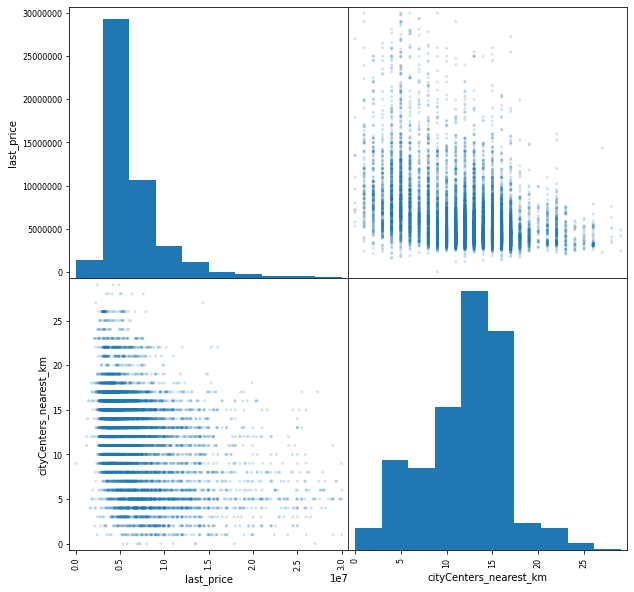

In [71]:
df_center_spb = df_spb[['last_price', 'cityCenters_nearest_km']]
pd.plotting.scatter_matrix(df_center_spb, figsize=(10, 10), alpha=0.2);

In [72]:
df_spb_center = df_spb.pivot_table(index='cityCenters_nearest_km', values='last_price', aggfunc=['count', 'mean', 'median'])
df_spb_center

,count,mean,median
,last_price,last_price,last_price
cityCenters_nearest_km,,,
0.0,12,1.107333e+07,8795000.0
1.0,107,1.100072e+07,9850000.0
2.0,186,1.011702e+07,8995000.0
3.0,219,8.710520e+06,7563000.0
4.0,436,9.467727e+06,8300000.0
5.0,594,1.004134e+07,8400000.0
6.0,402,8.839551e+06,7578500.0
7.0,284,8.452559e+06,6650000.0


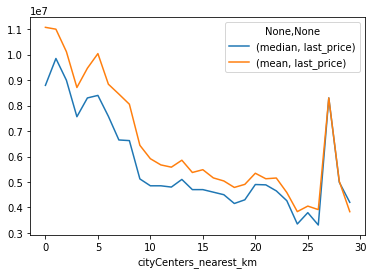

In [73]:
df_spb_center.plot(y = ['median', 'mean']);

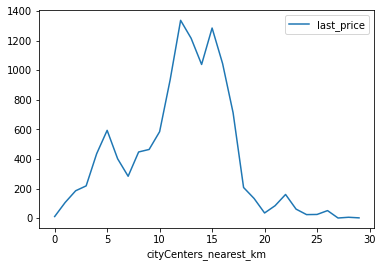

In [74]:
df_spb_center.plot(y = 'count');

В целом, смотря на графики и сводную таблицу, можно сделать вывод, что первые 8 км от центра Петербурга сильно влияют на стоимость. Чем ближе в радиусе 7 км к центру, тем дороже квартира. Далее после 25 мы можем увидеть выброс, что обуславливается маленьким количеством квартир в этом радиусе. Скорее всего далее начинаются другие населённые пункты.
  
Больше всего квартир в радиусе от 12 до 17 км от центра.

In [75]:
df_center_spb = df_spb[df_spb['cityCenters_nearest_km'] <= 7]

In [76]:
# выведем матрицу корреляции по Петербургу
df_center_spb[['total_images', 'last_price', 'total_area', 'ceiling_height', 'living_area', 'kitchen_area', 'airports_nearest', 'parks_nearest', 'ponds_nearest', 'square_meter_price', 'cityCenters_nearest_km']].corr().style.background_gradient('coolwarm')

,total_images,last_price,total_area,ceiling_height,living_area,kitchen_area,airports_nearest,parks_nearest,ponds_nearest,square_meter_price,cityCenters_nearest_km
total_images,1.000000,0.149482,0.053544,0.089369,0.042018,0.108078,0.039126,-0.022537,0.012051,0.144447,0.011411
last_price,0.149482,1.000000,0.725181,0.161684,0.557497,0.546261,0.107065,0.018899,-0.048647,0.564277,-0.087258
total_area,0.053544,0.725181,1.000000,0.227049,0.889490,0.482743,-0.023479,-0.017163,-0.017274,-0.101465,-0.158481
ceiling_height,0.089369,0.161684,0.227049,1.000000,0.243848,0.123266,-0.054098,-0.076901,-0.039278,-0.014789,-0.244426
living_area,0.042018,0.557497,0.889490,0.243848,1.000000,0.243512,-0.070054,-0.060008,-0.006666,-0.210338,-0.189432
kitchen_area,0.108078,0.546261,0.482743,0.123266,0.243512,1.000000,0.045427,0.034347,-0.026992,0.215143,-0.070539
airports_nearest,0.039126,0.107065,-0.023479,-0.054098,-0.070054,0.045427,1.000000,-0.016570,0.074214,0.184268,0.333722
parks_nearest,-0.022537,0.018899,-0.017163,-0.076901,-0.060008,0.034347,-0.016570,1.000000,0.063374,0.064512,0.043922
ponds_nearest,0.012051,-0.048647,-0.017274,-0.039278,-0.006666,-0.026992,0.074214,0.063374,1.000000,-0.040554,0.243620
square_meter_price,0.144447,0.564277,-0.101465,-0.014789,-0.210338,0.215143,0.184268,0.064512,-0.040554,1.000000,0.025159


In [77]:
spb_columns = ['total_area', 'last_price', 'rooms', 'ceiling_height']
spb_columns2 = ['floor_type', 'weekday', 'month', 'year']

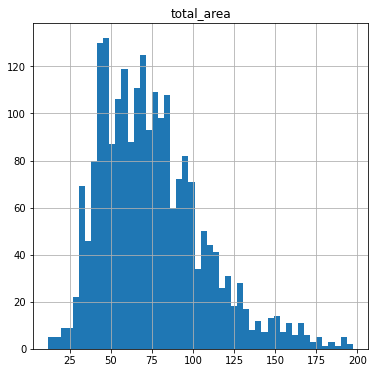

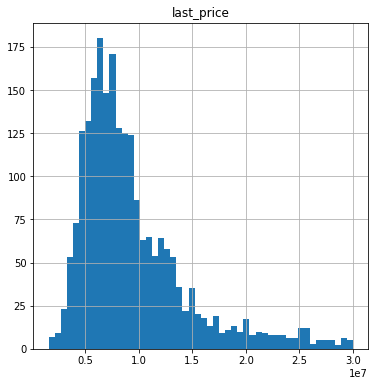

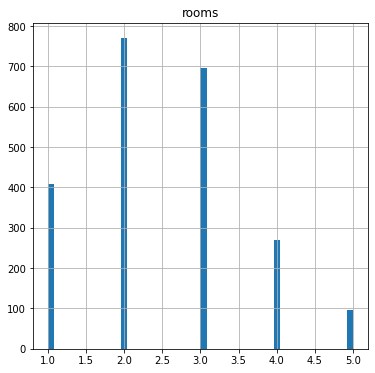

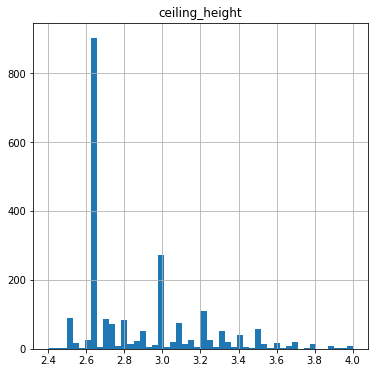

In [78]:
for col in spb_columns:
    df_center_spb.hist(col, bins=50, figsize=(6, 6))

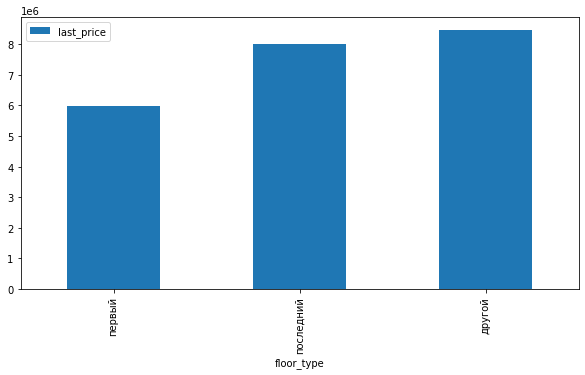

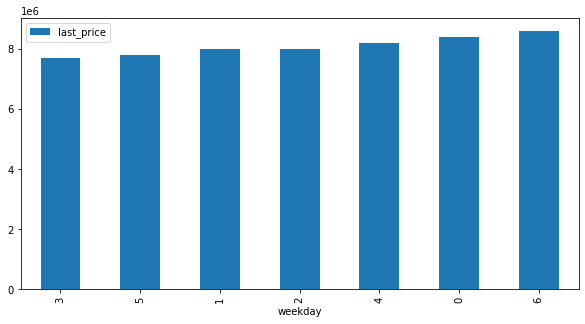

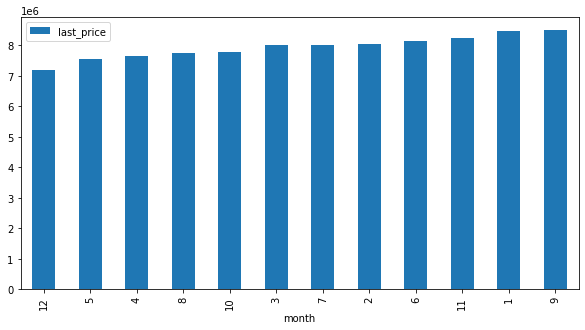

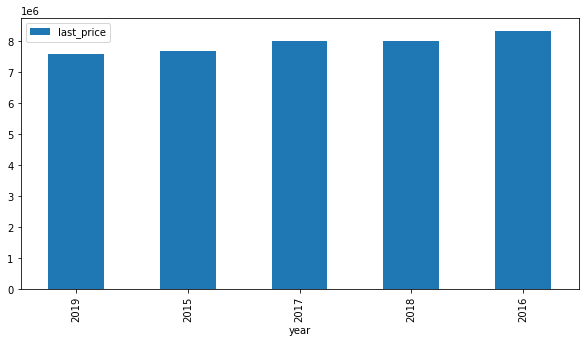

In [79]:
for col in spb_columns2:
    (df_center_spb
 .pivot_table(index=col, values='last_price', aggfunc='median')
 .sort_values(by='last_price')
 .plot(y='last_price', kind='bar', figsize=(10, 5))
)

Выводы по центру Петербурга:
  
  1. Больше всего на стоимость влияют общая площадь, жилая площадь, площадь кухни и количество комнат.
  2. Больше всего квартир с площадью около 65 кв м.
  3. 7 млн - самая частая цена для квартир в центре Петербурга.
  4. Квартир на последнем этаже больше, чем на первом и меньше, чем квартир на других этажах.
  5. Самые популярные месяца для выкладывания объявления - февраль, январь и март. Самые популярные дни недели - воскресенье и вторник.
  6. Сильнее всего цены зависят от близости к центру в первые 7 км.

### Общий вывод

В рамках данного проекта мы получили датасет с данными о недвижимости в Санкт-Петербурге и Ленинградской области. Мы провели предобработку данных, в рамках которой убрали все возможные пропуски, избавились от неявных дубликатов. Поменяли типы данных для дальнейшего анализа. Дополнительно после первичного анализа мы избавились от аномальных значений. Добавили дополнительные переменные, такие как цена за квадратный метр, тип этажности квартиры, день, месяц и год выставления квартиры на продажу, а также расстояние до центра в метрах. В ходе анализа мы выявили, что больше всего стоимость квартиры зависит от площади квартиры. В центре Петербурга стоимость квартиры в среднем дороже на 2 млн рублей. Также мы выяснили, что разброс времени продажи квартиры начинается с 0 дней и заканчивается 470 днями. 
  
Важно сделать ограничение на такую переменную как высота потолков, так как потолки не могут даже чисто логически быть больше 10 метров.  
  
Также важно отметить, что есть переменные, которые никак не влияют на стоимость (например день публикации объявления, количество балконов и так далее)